In [1]:
import pandas as pd
import numpy as np

In [2]:
columns = ['id','country','Label','Text']
train_data = pd.read_csv('twitter_training.csv' , names = columns)
val_data = pd.read_csv('twitter_validation.csv' , names = columns)

In [3]:
train_data.head()

,id,country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
val_data.head()

,id,country,Label,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
train_data.shape , val_data.shape

((74682, 4), (1000, 4))

In [6]:
data = pd.concat([train_data , val_data])

In [7]:
data.head()

,id,country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
data = data.sample(frac = 1).reset_index(drop=True)

In [9]:
data.shape

(75682, 4)

In [10]:
data.drop('id' , axis = 1 , inplace = True)

In [11]:
data.isna().sum()

country      0
Label        0
Text       686
dtype: int64

In [12]:
data.dropna(inplace = True)

In [13]:
data.isna().sum()

country    0
Label      0
Text       0
dtype: int64

In [14]:
data.duplicated().sum()

3555

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.duplicated().sum()

0

In [17]:
data.sample(5)

,country,Label,Text
58826,RedDeadRedemption(RDR),Neutral,But One of the best games of 2019 is going out...
27495,NBA2K,Negative,"If they don’t, the people should Boycott 2K . 🥺🥺🥺"
28694,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,HOW TO WHO IMPRESS AN INDIAN GIRL. in sahilyad...
38969,Nvidia,Positive,More Minecraft X screenshots! This time a neon...
44130,CallOfDutyBlackopsColdWar,Positive,Just give me the game you're a beautiful perso...


In [18]:
data.Label.value_counts()

Negative      21657
Positive      19682
Neutral       17569
Irrelevant    12533
Name: Label, dtype: int64

In [19]:
data.country.value_counts()

CallOfDuty                           2323
Verizon                              2312
TomClancysRainbowSix                 2308
MaddenNFL                            2305
NBA2K                                2295
Facebook                             2291
Microsoft                            2291
TomClancysGhostRecon                 2277
ApexLegends                          2273
WorldOfCraft                         2265
johnson&johnson                      2264
Battlefield                          2250
CallOfDutyBlackopsColdWar            2247
LeagueOfLegends                      2246
FIFA                                 2242
Amazon                               2234
Dota2                                2233
Hearthstone                          2219
Overwatch                            2219
GrandTheftAuto(GTA)                  2211
Borderlands                          2208
HomeDepot                            2204
Google                               2199
Nvidia                            

In [20]:
sample = data[data['country'] == 'Google']
sample["Text"]

37       Black Girl of that Google voice said heartless...
52       I shouldn't be impressed until I can download ...
98                          And I live for this shit [UNK]
102      Great Google report for our website in Newark,...
108      Me: (falls down).. Message on google meet: ARE...
                               ...                        
75586    It's great that big companies can't do everyth...
75624    Some crazy shit you should just google if you ...
75627    Good Morning No Crime is Phones Chat and SMS, ...
75639    Two days of summer lessons for teachers from @...
75664    thinks Google sucks: Google white-washes forei...
Name: Text, Length: 2199, dtype: object

In [21]:
data.rename(columns = {"country" : "Topic"} , inplace = True)

In [22]:
data

,Topic,Label,Text
0,Amazon,Neutral,@Edhernandezwin7 Thanks for entering Grand Sum...
1,TomClancysGhostRecon,Neutral,The missions to the resistance event have been...
2,johnson&johnson,Neutral,Johnson And Reed announced the would continue ...
3,Cyberpunk2077,Neutral,Time Magazine's Great Dead Lady Is in an Incre...
4,Amazon,Positive,Woah!
...,...,...,...
75677,ApexLegends,Neutral,hey jayknaves is going live now RF welcome to ...
75678,Borderlands,Neutral,Messing around in borderlands 3!
75679,Hearthstone,Positive,Holy smokes I'm really enjoying my Libram Pala...
75680,Cyberpunk2077,Positive,I would love how the new Cyberpunk 2077 drama ...


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

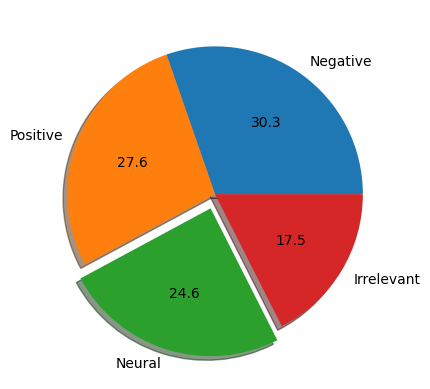

In [24]:
plt.pie(data.Label.value_counts() , labels = ["Negative" , "Positive" , "Neural" ,"Irrelevant"] , autopct = "%0.1f" , shadow = True,
       explode = [0,0,0.1,0])
plt.show()

<AxesSubplot: >

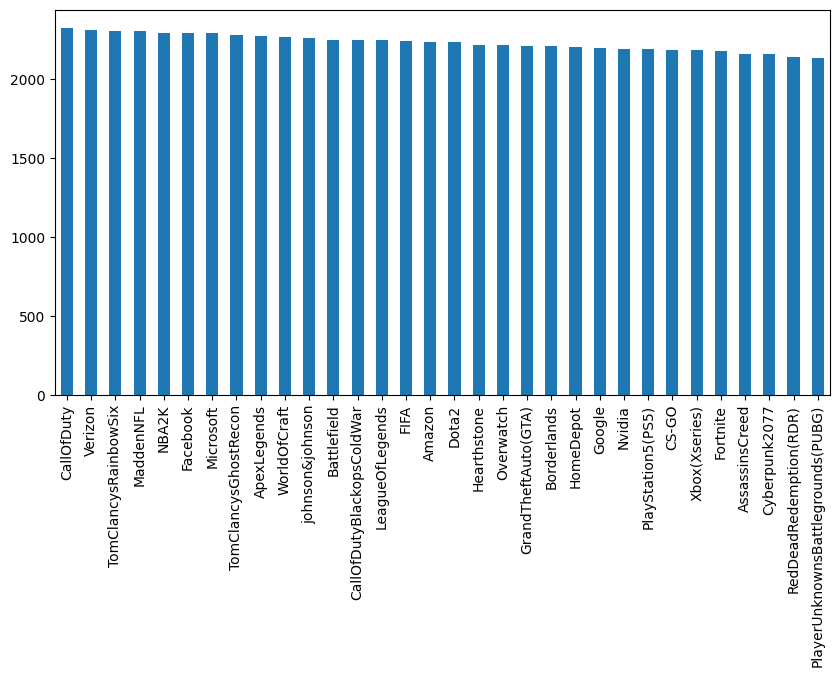

In [25]:
plt.figure(figsize = (10 , 5))
data['Topic'].value_counts().plot(kind = 'bar')

In [26]:
for i in range(0,10):
    print(data.Text[i+1])
    print("***********")

The missions to the resistance event have been completed, the hostage rescue needs to be more involved. Maybe a variant could be tested that does not require cloaking. Also, other missions were cool. Strike Designator is fun. That's it.
***********
Johnson And Reed announced the would continue selling coal talc.... smarthealthcarenews.com/johnson-johnso...
***********
Time Magazine's Great Dead Lady Is in an Incredible Figurine dlvr.it/RSYGH2 | bit.ly/fxtrade1
***********
Woah!
***********
Fortnite servers are really bad today/tonight. Been having lots of duo/squad load issues, and matchmaking issues...I haven’t seen anything posted from Epic or Fortnite but if you have problems with it loading, try going to select game mode and try again!
***********
@EAHelp good evening i can't access fifa it disconnects me from the server all single time but i can't play in ultimate team
***********
My neon princess... I am happy with the old photo and am already on this new Akali costume...
*******

In [27]:
# Emojis , links , half words , punctuations , stopwords , stemming

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import re
    
stemmer = PorterStemmer()

In [29]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}


In [30]:
import emoji

In [31]:
def clean(x):
    x = x.lower()
    text_contract = []
    for i in x.split(" "):
        if i in contractions:
            text_contract.append(contractions[i])
        else:
            text_contract.append(i)
    string = " ".join(text_contract)
    string = re.sub('http://\S+|https://\S+', '', string)
    string = emoji.demojize(string)
    string = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', string)
    string = re.sub("[^a-zA-Z0-9]", " ", string)
    string = [stemmer.stem(word) for word in string.split(" ") if word not in stopwords.words('english')]
    string = [word for word in string if len(word) >= 3]
    
    
    return " ".join(string)
    
    

data.Text = data.Text.apply(clean)

In [32]:
data.Text

0        edhernandezwin7 thank enter grand summon click...
1        mission resist event complet hostag rescu need...
2        johnson reed announc would continu sell coal t...
3        time magazin great dead ladi incred figurin dl...
4                                                     woah
                               ...                        
75677    hey jayknav live welcom knave casino dub time ...
75678                               mess around borderland
75679    holi smoke realli enjoy libram paladin deck yo...
75680    would love new cyberpunk 2077 drama trailer im...
75681    lose interest releas legion plu game poorli re...
Name: Text, Length: 71441, dtype: object

In [33]:
def length(x):
    return len(x.split(" "))

data["no of words"] = data.Text.apply(length)

In [34]:
data

,Topic,Label,Text,no of words
0,Amazon,Neutral,edhernandezwin7 thank enter grand summon click...,23
1,TomClancysGhostRecon,Neutral,mission resist event complet hostag rescu need...,20
2,johnson&johnson,Neutral,johnson reed announc would continu sell coal t...,12
3,Cyberpunk2077,Neutral,time magazin great dead ladi incred figurin dl...,11
4,Amazon,Positive,woah,1
...,...,...,...,...
75677,ApexLegends,Neutral,hey jayknav live welcom knave casino dub time ...,16
75678,Borderlands,Neutral,mess around borderland,3
75679,Hearthstone,Positive,holi smoke realli enjoy libram paladin deck yo...,14
75680,Cyberpunk2077,Positive,would love new cyberpunk 2077 drama trailer im...,28


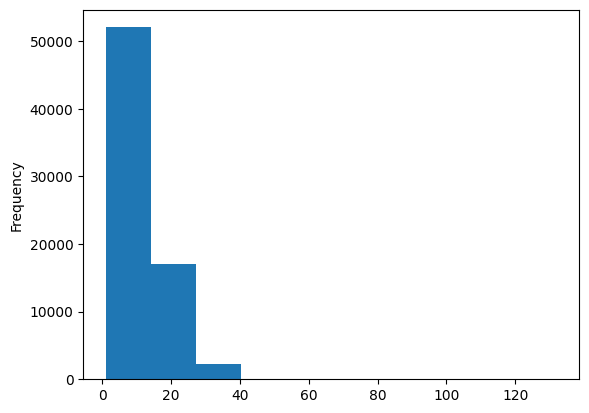

In [35]:
data["no of words"].plot(kind = "hist")
plt.show()

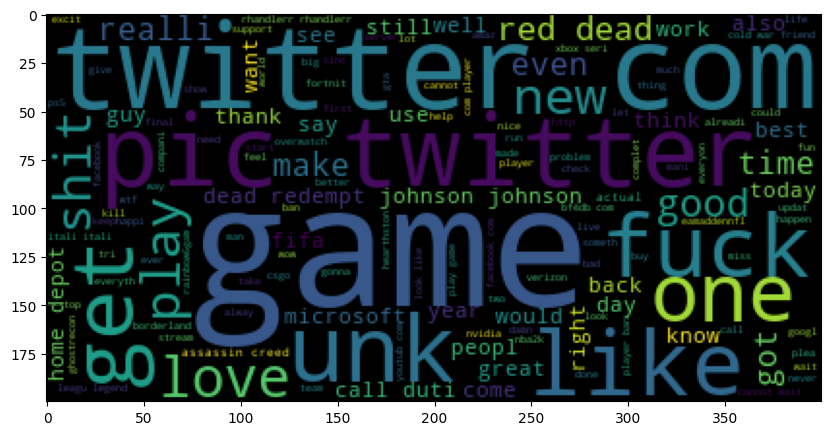

In [36]:
plt.figure(figsize = (10 , 10))
plt.imshow(WordCloud(background_color='black' , stopwords=set(stopwords.words('english'))).generate(" ".join(data.Text)))

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [38]:
y = data.Label

label = LabelEncoder()
y = label.fit_transform(y)

In [39]:
label.classes_

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [40]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM , Embedding , GlobalAveragePooling1D , Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Text)
tokenized_text = tokenizer.texts_to_sequences(data.Text)
vocab = len(tokenizer.word_index) + 1

maxlength = max([len(i) for i in tokenized_text])

padded_text = pad_sequences(tokenized_text , maxlen = maxlength , padding = "post")

In [42]:
padded_text.shape

(71441, 132)

In [43]:
padded_text

array([[16180,    21,   538, ...,     0,     0,     0],
       [  616,  3823,   285, ...,     0,     0,     0],
       [   17,  6269,   359, ...,     0,     0,     0],
       ...,
       [  503,  1610,    14, ...,     0,     0,     0],
       [   37,     9,    13, ...,     0,     0,     0],
       [  302,   249,   176, ...,     0,     0,     0]])

In [44]:
xtrain , xtest , ytrain , ytest = train_test_split(padded_text , y, test_size=0.2 , random_state = 42)

In [45]:
xtrain.shape , ytrain.shape

((57152, 132), (57152,))

In [46]:
xtrain

array([[ 8027, 19682,   867, ...,     0,     0,     0],
       [   17,    17,   362, ...,     0,     0,     0],
       [  759,    65,     0, ...,     0,     0,     0],
       ...,
       [ 2485,  2485,   866, ...,     0,     0,     0],
       [  296,    64,   108, ...,     0,     0,     0],
       [   26,  1471,   915, ...,     0,     0,     0]])

In [48]:
model = Sequential()
model.add(Embedding(output_dim = 128 , input_dim = vocab))
model.add(LSTM(100 , return_sequences = True))
model.add(LSTM(100 , return_sequences = True))
model.add(GlobalAveragePooling1D())
model.add(Dense(4 , activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2992384   
                                                                 
 lstm_1 (LSTM)               (None, None, 100)         91600     
                                                                 
 lstm_2 (LSTM)               (None, None, 100)         80400     
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 3,164,788
Trainable params: 3,164,788
Non-trainable params: 0
____________________________________________

In [49]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = "Adam" , metrics = ['accuracy'])

In [50]:
history = model.fit(xtrain , ytrain , epochs = 10 , validation_data = (xtest , ytest))

Epoch 1/10
1786/1786 [==============================] - 894s 496ms/step - loss: 1.2026 - accuracy: 0.4792 - val_loss: 0.9891 - val_accuracy: 0.6205
Epoch 2/10
1786/1786 [==============================] - 886s 496ms/step - loss: 0.7449 - accuracy: 0.7235 - val_loss: 0.6163 - val_accuracy: 0.7757
Epoch 3/10
1786/1786 [==============================] - 712s 399ms/step - loss: 0.4378 - accuracy: 0.8434 - val_loss: 0.4549 - val_accuracy: 0.8318
Epoch 4/10
1786/1786 [==============================] - 464s 260ms/step - loss: 0.3198 - accuracy: 0.8813 - val_loss: 0.4188 - val_accuracy: 0.8488
Epoch 5/10
1786/1786 [==============================] - 459s 257ms/step - loss: 0.2548 - accuracy: 0.9041 - val_loss: 0.3910 - val_accuracy: 0.8634
Epoch 6/10
1786/1786 [==============================] - 473s 265ms/step - loss: 0.2123 - accuracy: 0.9184 - val_loss: 0.3851 - val_accuracy: 0.8723
Epoch 7/10
1786/1786 [==============================] - 454s 254ms/step - loss: 0.1757 - accuracy: 0.9324 - val_

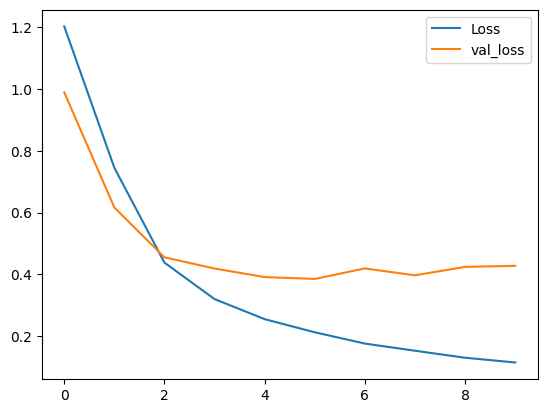

In [51]:
plt.plot(history.history['loss'] , label = "Loss")
plt.plot(history.history['val_loss'] , label = "val_loss")
plt.legend()
plt.show()

In [52]:
# It is overfitting now. We may have controlled with some callbacks like : Early Stopping , ModeCheckpoint. But we will try for prediction and then use transformers.

In [56]:
history = model.fit(xtrain , ytrain , epochs = 15 , validation_data = (xtest , ytest) , initial_epoch = 10)

Epoch 11/15
1786/1786 [==============================] - 473s 265ms/step - loss: 0.1019 - accuracy: 0.9584 - val_loss: 0.4634 - val_accuracy: 0.8851
Epoch 12/15
1786/1786 [==============================] - 455s 255ms/step - loss: 0.0916 - accuracy: 0.9621 - val_loss: 0.4757 - val_accuracy: 0.8892
Epoch 13/15
1786/1786 [==============================] - 466s 261ms/step - loss: 0.0840 - accuracy: 0.9649 - val_loss: 0.4985 - val_accuracy: 0.8875
Epoch 14/15
1786/1786 [==============================] - 450s 252ms/step - loss: 0.0784 - accuracy: 0.9663 - val_loss: 0.5229 - val_accuracy: 0.8868
Epoch 15/15
1786/1786 [==============================] - 456s 256ms/step - loss: 0.0760 - accuracy: 0.9669 - val_loss: 0.5178 - val_accuracy: 0.8884


In [57]:
model.save('sentiment11.h5')

In [58]:
model.evaluate(xtest , ytest)

447/447 [==============================] - 47s 104ms/step - loss: 0.5178 - accuracy: 0.8884


[0.5177907347679138, 0.8883756995201111]

In [59]:
classes = label.classes_

In [60]:
def predict(x):
    string = clean(x)
    print(string)
    tokenizes = tokenizer.texts_to_sequences([string])
    padded = pad_sequences(tokenizes , maxlen = 132 , padding = 'post')
    return np.argmax(model.predict(padded))

In [66]:
string = "Exciting news actually and very happy to see it."

classes[predict(string)]

excit news actual happi see
1/1 [==============================] - 0s 55ms/step


'Positive'

In [62]:
import pickle
pickle.dump(tokenizer , open("tokenizer_sentiment1.pkl" , 'wb'))

In [3]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest', tokenizer='cardiffnlp/twitter-roberta-base-sentiment-latest')
sentiment_task("Covid cases are increasing fast!")

C:\Python 310\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'negative', 'score': 0.723576545715332}]

In [4]:
import pickle

In [5]:
pickle.dump(sentiment_task , open('transformer_for_sentiment' , 'wb'))

In [6]:
transformer = pickle.load(open('transformer_for_sentiment' , 'rb'))

In [8]:
transformer(['Hello, I am Ajinkya , It was very nice to meet you.'])

[{'label': 'positive', 'score': 0.9806104898452759}]